<a href="https://colab.research.google.com/github/ErickMMuniz/NetworkAnalysis_TwitterTrends/blob/main/colab_burstkit_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download all datasets and codes

In [59]:
#@title **[WARNING]** : Solo usar esta celda en caso de reiniciar todo.  

#Uncomment this lines to be safe
# !rm -rf /content/data
# !rm -rf /content/burstkit
# !rm -rf /content/NetworkAnalysis_TwitterTrends/
# !rm -rf /content/README.txt
# !rm -rf /content/bin_colab.sh
# !rm -rf /content/follower_gcc.anony.dat
# !rm -rf /content/mention_gcc.anony.dat
# !rm -rf /content/retweet_gcc.anony.dat
# !rm -rf /content/timeline_tag.anony.dat
# !rm -rf /content/timeline_tag_men.anony.dat
# !rm -rf /content/timeline_tag_rt.anony.dat
# !rm -rf /content/virality2013.tar.gz

In [6]:
#@title Dataset

!wget https://zenodo.org/record/4686013/files/virality2013.tar.gz
!mkdir data
!mkdir data/virality2013.tar/
!tar -xf virality2013.tar.gz -C data/virality2013.tar/

--2022-06-08 07:44:42--  https://zenodo.org/record/4686013/files/virality2013.tar.gz
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 526346240 (502M) [application/octet-stream]
Saving to: ‘virality2013.tar.gz’

virality2013.tar.gz 100%[===================>] 501.96M  40.5MB/s    in 27s     

2022-06-08 07:45:10 (18.3 MB/s) - ‘virality2013.tar.gz’ saved [526346240/526346240]



In [7]:
#@title clone repository
!git clone https://github.com/ErickMMuniz/NetworkAnalysis_TwitterTrends.git
!mv /content/NetworkAnalysis_TwitterTrends/burstkit /content/

Cloning into 'NetworkAnalysis_TwitterTrends'...
remote: Enumerating objects: 346, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 346 (delta 52), reused 70 (delta 33), pack-reused 247
Receiving objects: 100% (346/346), 32.75 MiB | 25.19 MiB/s, done.
Resolving deltas: 100% (139/139), done.


# Project


In [65]:
#@title Dependencias
import numpy as np
import networkx as nx

In [64]:
#@title ***[WARNING]***: Siempre se debe correr esta celda para tener los mismo resultados.  
import numpy as np
from burstkit.util import SEED
np.random.seed(SEED)

# Compute principal graphs

In [ ]:
import burstkit
from burstkit.calculate.graphs_attributes import calculate_some_metrics_and_return_graph_follower

G = calculate_some_metrics_and_return_graph_follower()

In [4]:
# import networkx as nx

# nx.write_gml(G, path = "/content/drive/MyDrive/tesis/data/mutual_followers_network_with_attributes.gml")

In [28]:
import pandas as pd
degree_attribute: "dict[str, int]" = dict(G.degree())
dict_core_number = degree_attribute
nodes = dict_core_number.keys()
value = dict_core_number.values()
df_core_number = pd.DataFrame(data={"uid":nodes,
                   "value":value})

#df_core_number.to_csv("/content/drive/MyDrive/tesis/data/mutual_follow_network/attributes/degree.csv",index=False)

In [ ]:
grerdy_communities = nx.algorithms.community.greedy_modularity_communities(G)

In [ ]:
nodes = dict_core_number.keys()
value = dict_core_number.values()
df_core_number = pd.DataFrame(data={"uid":nodes,
                   "value":value})

df_core_number.to_csv("/content/drive/MyDrive/tesis/data/mutual_follow_network/attributes/core_number.csv",index=False)

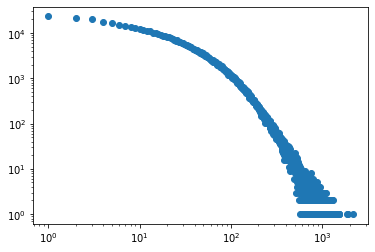

In [16]:
from collections import Counter
degree_attribute: "dict[str, int]" = dict(G.degree())
degree_sequence = degree_attribute.values()
degree_counter = dict(Counter(degree_sequence))

X = degree_counter.keys()
Y = degree_counter.values()

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X,Y)
ax.set_xscale("log")
ax.set_yscale("log")
fig.show()

In [ ]:
#@title Graph k-core number vs number of Tweets

import burstkit.util.read_files as rf
TREND_TIMELINE_TWEETS : "dict[str, pd.DataFrame]" = rf.get_relation_trend_timeline_tweets()


In [ ]:
at_least_trends = filter(lambda trend_name: TREND_TIMELINE_TWEETS[trend_name].shape[0] > 4000, TREND_TIMELINE_TWEETS)
trend : "str" = list(at_.keys())[0]
timetime : "pd.DataFrame" = TREND_TIMELINE_TWEETS[trend]

In [ ]:
# F = nx.read_gml(path = "/content/drive/MyDrive/tesis/data/mutual_followers_network_with_attributes.gml")
# !cat /content/drive/MyDrive/tesis/data/mutual_followers_network_with_attributes.gml

# Danger zone

In [4]:
#@title NetworkIt install
!sudo apt install build-essential
!sudo apt install python3-dev python3-pip
!pip3 install cmake cython
!pip3 install networkit

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.6.7-1~18.04).
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |█████

In [5]:
from networkit import *
g = generators.HyperbolicGenerator(1e5).generate()
overview(g)

Network Properties:
nodes, edges			100000, 299353
directed?			False
weighted?			False
isolated nodes			1821
self-loops			0
density				0.000060
clustering coefficient		0.718342
min/max/avg degree		0, 3728, 5.987060
degree assortativity		-0.007708
number of connected components	4121
size of largest component	74313 (74.31 %)
